# HYPERTENSION SBP

Last modification: 03/07/2023

In [47]:
import function_diseases_associations as fda
import function_figures_associations as ffa
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [48]:
# REQUIRED FOR THE FIRST PART: COMPUTING THE BETAS AND PVALUES

only_main_vascular_phenotypes = True #True

Normalization=False 

file_info_name='pheno_diseases_info.csv'
pheno_info_file = f'/SSD/home/sofia/retina-phenotypes/complementary/{file_info_name}'
diseases_file ='/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/diseases_cov/2022_11_23_covar_fix_diseases_cov.csv'
pheno_file ='/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/participant_phenotype/2022_11_23_covar_fix_z_corrected.csv'
output_dir ='/SSD/home/sofia/retina-phenotypes/complementary/disease_association/'

In [49]:
if only_main_vascular_phenotypes:
    list_phenotypes=["tau1_artery", "tau1_vein", "D_A_std", "D_V_std", "bifurcations", "VD_orig_artery", "VD_orig_vein", 
                     "ratio_VD", "mean_angle_taa" , "mean_angle_tva", "eq_CRAE", "eq_CRVE", "ratio_CRAE_CRVE",
                     "medianDiameter_artery", "medianDiameter_vein", "ratio_AV_medianDiameter"]
else:
    list_phenotypes=['AVScore_all', 'tau1_all', 'tau1_artery', 'tau1_vein', 'tau2_all', 'tau2_artery', 'tau2_vein', 
                     'tau4_all', 'tau4_artery', 'tau4_vein', 'D_std', 'D_A_std', 'D_V_std', 'D_median_CVMe', 'D_CVMe', 
                     'D_CVMe_A', 'D_CVMe_V', 'N_median_main_arteries', 'N_median_main_veins', 'arcLength_artery', 'arcLength_vein', 
                     'bifurcations', 'VD_orig_all', 'VD_orig_artery', 'VD_orig_vein', 'ratio_VD', 'slope', 'slope_artery', 'slope_vein', 
                     'mean_angle_taa', 'mean_angle_tva', 'medianCenter1_artery', 'medianCenter1_vein', 'medianCenter2_artery', 'medianCenter2_vein', 
                     'eq_CRAE', 'eq_CRVE', 'median_CRAE', 'median_CRVE', 'ratio_CRAE_CRVE', 'ratio_median_CRAE_CRVE', 'medianDiameter_all',
                     'medianDiameter_artery','medianDiameter_vein', 'ratio_AV_medianDiameter']

# FIRST PART: COMPUTE BETAS AND PVALUES

In [51]:

df_diseases, inf, list_diseases, list_diseases_bin, list_diseases_con, list_diseases_cat = fda.read_diseases_files(diseases_file, pheno_info_file)

####################### 2 - Phenotypes:

df_pheno =  fda.read_pheno(pheno_file)

####################### 3 - Merge diseases and phenotpyes
df_pheno_dise = fda.merge_pheno_diseases(df_pheno, df_diseases)

# Filtrate only by the phenotypes and diseases of interest
df_pheno_dise = fda.filtrate_col(df_pheno_dise, list_phenotypes+list(list_diseases))

if Normalization==True:
    # Replace nans by 0's in cases/controls
    df_pheno_dise = fda.column_startwith_replace_nan_by_0(df_pheno_dise)

    # Standardise continuous diseasesa and continuous phenotypes if not z-scored

    df_pheno_dise =  fda.std_contin_col(df_pheno_dise, list_diseases_con)

    # Check the type of variables and convert objects to numeric:

    ### convert to type numeric the columns that are not
    df_pheno_dise['date_reported_atherosclerosis'] = pd.to_numeric(df_pheno_dise['date_reported_atherosclerosis']) # 'date_disorders_arteries_arterioles', 'date_AD', 'date_death',
    df_pheno_dise = fda.col_to_numeric(df_pheno_dise)


Len BEFORE merge: pheno size , diseases size:  68324 81859
Len AFTER merge:  68324


In [56]:
df_pheno_dise['age_high_BP_both'].value_counts()

-1.0     1654
 50.0    1602
 55.0    1190
 60.0    1142
 40.0     959
 45.0     915
 58.0     683
 52.0     597
 48.0     525
 56.0     523
 62.0     485
 54.0     442
 59.0     425
 53.0     412
 57.0     405
 65.0     403
 42.0     333
 46.0     319
 63.0     313
 49.0     307
 51.0     306
 61.0     303
 64.0     292
 47.0     260
 44.0     250
 35.0     217
 30.0     201
 43.0     201
 66.0     166
 38.0     143
 67.0     133
 41.0     129
 68.0     107
 36.0     105
 39.0     103
 32.0      89
 37.0      83
 25.0      81
 28.0      76
 33.0      70
 27.0      62
 34.0      59
 29.0      55
 26.0      54
 69.0      52
 24.0      48
 20.0      46
 23.0      45
 31.0      45
 21.0      42
 22.0      33
 19.0      28
 18.0      28
 70.0      23
-3.0       20
 71.0      13
 73.0       6
 72.0       5
Name: age_high_BP_both, dtype: int64

In [24]:

def scatter_both(col_1, col_2):
    # Remove rows with NaN values in col_1 or col_2
    df_cleaned = df_pheno_dise[[col_1, col_2]].dropna()
    
    # Extract the cleaned data
    col_1_cleaned = df_cleaned[col_1]
    col_2_cleaned = df_cleaned[col_2]
    
    plt.scatter(col_1_cleaned, col_2_cleaned, alpha=0.5, s=0.1)
    
    # Calculate and plot the tendency line
    m, b = np.polyfit(col_1_cleaned, col_2_cleaned, 1)
    plt.plot(col_1_cleaned, m * col_1_cleaned + b, color='red')
    
    # Add equation of the line to the plot
    equation = f'y = {m:.2f}x + {b:.2f}'
    plt.text(0.5, 0.9, equation, ha='center', va='center', transform=plt.gca().transAxes)
    
    # Add axis labels
    plt.xlabel(col_1)
    plt.ylabel(col_2)
    
    # Add title with the column names and number of dots
    plt.title(f'Scatter Plot: {col_1} vs {col_2}\nNumber of Dots: {len(df_cleaned)}')
    
    plt.show()


df_pheno_dise['SBP_both']
df_pheno_dise['age_high_BP_both']

df_pheno_dise['D_A_std']
df_pheno_dise['D_V_std']
df_pheno_dise['eq_CRAE']
df_pheno_dise['eq_CRVE']
df_pheno_dise['ratio_CRAE_CRVE']
df_pheno_dise['medianDiameter_artery']
df_pheno_dise['medianDiameter_vein']
df_pheno_dise['ratio_AV_medianDiameter']

#scatter_both('SBP_both', 'age_high_BP_both')
#scatter_both('DBP_both', 'age_high_BP_both')
#for c1 in ['DBP_both', 'age_high_BP_both']:
#    for c2 in ['D_A_std', 'D_V_std', 'eq_CRAE', 'eq_CRVE', 'ratio_CRAE_CRVE', 'medianDiameter_artery', 'medianDiameter_vein', 'ratio_AV_medianDiameter']:
#        scatter_both(c1, c2)

0       -0.610428
1       -0.197303
2        0.351739
3        0.861991
4        0.089038
           ...   
68319   -0.022218
68320    0.676467
68321    0.942756
68322    0.452643
68323   -0.545264
Name: ratio_AV_medianDiameter, Length: 68324, dtype: float64

In [46]:
#sven.bergmann: This is tricky: Let's think of three groups: 
# (1) low BP/no HT, (2) low BP but HT (medication successful), (3) high BP/HT (medication unsuccessful). 
# From the BP-V_std_D anti correlation, it follows that (3) should have lower V_std_D than (1). 
# The only way I can see then to get a positive correlation between V_std_D and HT would be to have
#  (2) have higher V_std_D than (1), and to be bigger than (3). So medication would "overcompensate".

#Could you plot box diagrams of V_std_D for the three groups to test this? (low BP would be DBP<80 and SBP<120, and high BP is DBP>90 or SBP>130).


# Extract SBP and DBP values from the dataframe
SBP = df_pheno_dise['SBP_both']
DBP = df_pheno_dise['DBP_both']
V_std_D = df_pheno_dise['D_V_std']

# Filter for SBP below 120
#df_pheno_dise['SBP_both_lower_120'] = np.where(SBP < 120, SBP, np.nan)

# Filter for SBP above 130
#df_pheno_dise['SBP_both_higher_130'] = np.where(SBP > 130, SBP, np.nan)

# Filter for DBP below 80
#df_pheno_dise['DBP_both_lower_80'] = np.where(DBP < 80, DBP, np.nan)

# Filter for DBP below 90
#df_pheno_dise['DBP_both_lower_90'] = np.where(DBP < 90, DBP, np.nan)

# Define the criteria for low and high blood pressure
low_BP_criteria = (DBP < 80) & (SBP < 120)
high_BP_criteria = (DBP > 90) | (SBP > 130)

# Create dataframes for the three groups
low_BP_data = V_std_D[low_BP_criteria].dropna()
normal_BP_data = V_std_D[~low_BP_criteria & ~high_BP_criteria].dropna()
high_BP_data = V_std_D[high_BP_criteria].dropna()


# Prepare data for plotting
data = [low_BP_data, normal_BP_data, high_BP_data]
labels = ['Low BP', 'Normal BP', 'High BP']


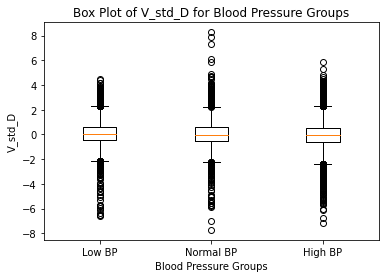

In [32]:
# Plot box plots for the three groups
plt.boxplot(data, labels=labels)
plt.xlabel('Blood Pressure Groups')
plt.ylabel('V_std_D')
plt.title('Box Plot of V_std_D for Blood Pressure Groups')
plt.show()

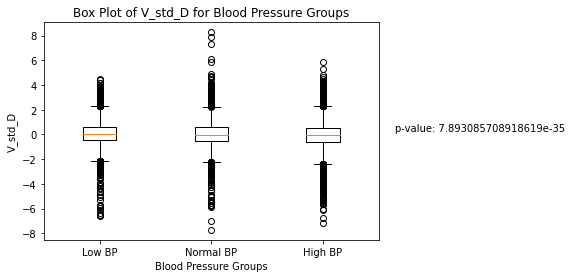

In [36]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(low_BP_data, normal_BP_data, high_BP_data)

# Prepare data for plotting
data = [low_BP_data, normal_BP_data, high_BP_data]
labels = ['Low BP', 'Normal BP', 'High BP']

# Plot box plots for the non-empty groups
plt.boxplot(data, labels=labels)
plt.xlabel('Blood Pressure Groups')
plt.ylabel('V_std_D')
plt.title('Box Plot of V_std_D for Blood Pressure Groups')

# Display the p-value
plt.text(1.05, 0.5, f'p-value: {p_value:}', transform=plt.gca().transAxes)

plt.show()

sample_sizes [10150, 673, 14545, 27544]


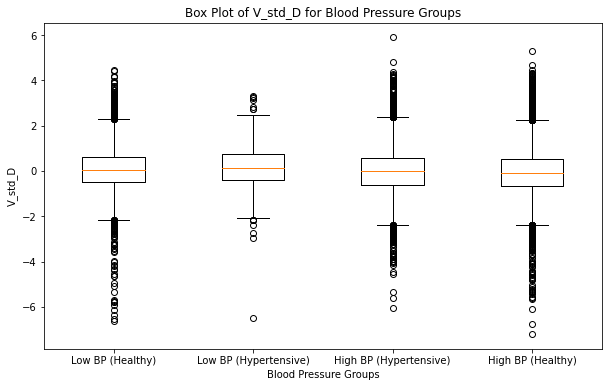

In [45]:
SBP = df_pheno_dise['SBP_both']
DBP = df_pheno_dise['DBP_both']
V_std_D = df_pheno_dise['D_V_std']
age_high_BP = df_pheno_dise['age_high_BP_both']

# Define the criteria for low and high blood pressure
low_BP_criteria = (DBP < 80) & (SBP < 120)
high_BP_criteria = (DBP > 90) | (SBP > 130)

# Create dataframes for the four groups
low_BP_data_healthy = V_std_D[low_BP_criteria & (age_high_BP == 0)].dropna()
low_BP_data_hypertense = V_std_D[low_BP_criteria & (age_high_BP == 1)].dropna()
high_BP_data_hypertense = V_std_D[high_BP_criteria & (age_high_BP == 1)].dropna()
high_BP_data_healthy = V_std_D[high_BP_criteria & (age_high_BP == 0)].dropna()

# Prepare data for plotting
data = [low_BP_data_healthy, low_BP_data_hypertense, high_BP_data_hypertense, high_BP_data_healthy]
labels = ['Low BP (Healthy)', 'Low BP (Hypertensive)', 'High BP (Hypertensive)', 'High BP (Healthy)']
sample_sizes = [len(low_BP_data_healthy), len(low_BP_data_hypertense), len(high_BP_data_hypertense), len(high_BP_data_healthy)]

print('sample_sizes', sample_sizes)

plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels)
plt.xlabel('Blood Pressure Groups')
plt.ylabel('V_std_D')
plt.title('Box Plot of V_std_D for Blood Pressure Groups')
plt.show()
